<a href="https://colab.research.google.com/github/nileshmalode11/Model_Monitoring_regression/blob/main/Model_Monetoring_Housing_Power_consumtion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install nannyml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.8/20.8 MB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.4/59.4 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 260.5/260.5 kB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.6/133.6 kB 13.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 55.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 45.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 63.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.9/38.9 MB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 62.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 865.8/865.8 kB 42.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
! pip uninstall -y numpy
! pip uninstall -y setuptools
! pip install setuptools
! pip install numpy

Found existing installation: numpy 1.25.2
Uninstalling numpy-1.25.2:
  Successfully uninstalled numpy-1.25.2
Found existing installation: setuptools 68.0.0
Uninstalling setuptools-68.0.0:
  Successfully uninstalled setuptools-68.0.0
  Using cached setuptools-68.0.0-py3-none-any.whl (804 kB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
arviz 0.15.1 requires numpy>=1.20.0, which is not installed.
cufflinks 0.17.3 requires numpy>=1.9.2, which is not installed.
cvxpy 1.3.2 requires numpy>=1.15, which is not installed.
datascience 0.17.6 requires numpy, which is not installed.
ipython 7.34.0 requires jedi>=0.16, which is not installed.
mlxtend 0.22.0 requires numpy>=1.16.2, which is not installed.
nibabel 4.0.2 requires numpy>=1.17, which is not installed.
numba 0.56.4 requires numpy<1.24,>=1.18, which is not installed.
pandas-gbq 0.17.9 requires numpy>=1.16.6, w

  Using cached numpy-1.25.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.2 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
nannyml 0.9.1 requires numpy<1.25,>=1.24; python_version >= "3.8" and python_version < "3.12", but you have numpy 1.25.2 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.25.2 which is incompatible.
pandas-gbq 0.17.9 requires pyarrow<10.0dev,>=3.0.0, but you have pyarrow 12.0.1 which is incompatible.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.25.2 which is incompatible.


### **Importing Required Library**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense,Input
import os
from sklearn.preprocessing import StandardScaler
import sys
from sklearn.model_selection import KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD
import warnings

In [ ]:
import nannyml as nml


### **Importing dataset**

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/household electricity.zip",";")

<ipython-input-28-22fa9f0880bb>:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  df=pd.read_csv("/content/drive/MyDrive/household electricity.zip",";")
<ipython-input-28-22fa9f0880bb>:1: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("/content/drive/MyDrive/household electricity.zip",";")


In [ ]:
df


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0


In [ ]:
df2 = df.copy()

### **Data Understanding**

In [ ]:
df.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [ ]:
df.tail()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0
2075258,26/11/2010,21:02:00,0.932,0.0,239.55,3.8,0.0,0.0,0.0


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [ ]:
df.shape

(2075259, 9)

In [ ]:
df.describe()

,Sub_metering_3
count,2.049280e+06
mean,6.458447e+00
std,8.437154e+00
min,0.000000e+00
25%,0.000000e+00
50%,1.000000e+00
75%,1.700000e+01
max,3.100000e+01


**Checking for missing value**

In [ ]:
df.isnull().sum()

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

### **Data Processing**


**Droping Unwanted Columns**

In [ ]:
df=df.drop(["Date","Time"],axis=1)

**Missing Value Treatement**

In [ ]:
df=df.dropna()

**Converting object to float**

In [ ]:
df = df.astype("float")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2049280 entries, 0 to 2075258
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 125.1 MB


**Process to formulate target variable¶**

In [ ]:
df["power_consumtion"]=((df["Global_active_power"]*1000/60) - df["Sub_metering_1"] - df["Sub_metering_2"] - df["Sub_metering_3"])

In [ ]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,power_consumtion
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266667
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.333333
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.566667
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0,71.800000
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0,43.100000


### **Exploratory Data Analysis**

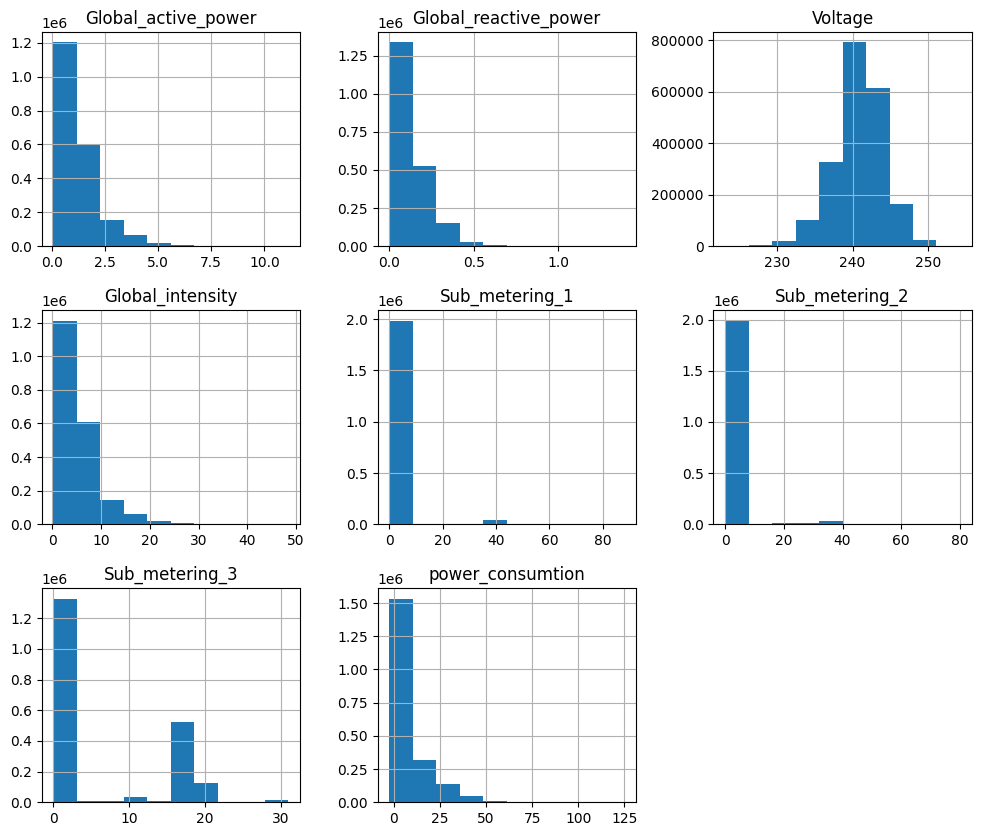

In [ ]:
df.hist(figsize = (12,10))
plt.show()

### **Data Splitting**

In [ ]:
df1 = df.copy()

In [ ]:
X=df.drop(["power_consumtion"],axis=1)
y=df["power_consumtion"]

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.10,random_state=0)
X_train,X_prod,y_train,y_prod=train_test_split(X_train,y_train,test_size=0.10,random_state=0)

### **Model Fitting**

**Deep Neural Network**

In [ ]:
model = Sequential()

# The Input Layer :
model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
model.add(Dense(256, kernel_initializer='normal',activation='relu'))
model.add(Dense(256, kernel_initializer='normal',activation='relu'))
model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])


**Model Summary**

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1024      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 1)                 257       
                                                                 
Total params: 165,889
Trainable params: 165,889
Non-trainable params: 0
_________________________________________________________________


**Model Training**

In [ ]:

model.fit(X_train, y_train, epochs=2, batch_size=32, validation_split = 0.1)


Epoch 1/2
46686/46686 [==============================] - 357s 8ms/step - loss: 0.3302 - mean_absolute_error: 0.3302 - val_loss: 0.1639 - val_mean_absolute_error: 0.1639
Epoch 2/2
46686/46686 [==============================] - 333s 7ms/step - loss: 0.1772 - mean_absolute_error: 0.1772 - val_loss: 0.1651 - val_mean_absolute_error: 0.1651


**Model Prediction**

In [ ]:
y_pred = model.predict(X_test)

6404/6404 [==============================] - 16s 3ms/step


In [ ]:
y_pred_train = model.predict(X_train)

51873/51873 [==============================] - 134s 3ms/step


In [ ]:
from sklearn.metrics import r2_score
score_train=r2_score(y_train,y_pred_train)
print(score_train)
score_test=r2_score(y_test,y_pred)
print(score_test)

In [ ]:
from sklearn.metrics import mean_squared_error
mse_score_train = mean_squared_error(y_train,y_pred_train)
mse_score = mean_squared_error(y_test,y_pred)
print(mse_score_train)
print(mse_score)

### **Model Evaluaton**

In [ ]:
from sklearn.metrics import mean_absolute_error
# Make baseline predictions
y_pred_train_baseline = np.ones_like(y_train) * y_train.mean()
y_pred_test_baseline = np.ones_like(y_test) * y_train.mean()

# Measure train, test and baseline performance
mae_train = mean_absolute_error(y_train, y_pred_train).round(4)
mae_test = mean_absolute_error(y_test, y_pred).round(4)

mae_train_baseline = mean_absolute_error(y_train, y_pred_train_baseline).round(4)
mae_test_baseline = mean_absolute_error(y_test, y_pred_test_baseline).round(4)

**Adding Timestamp Column**

In [ ]:
df1['date_time'] = df2['Date'].astype(str) + ' ' + df2['Time'].astype(str)

In [ ]:
df1

In [ ]:
X_train['date_time'] = df2['Date'].astype(str) + ' ' + df2['Time'].astype(str)

In [ ]:
X_test['date_time'] = df2['Date'].astype(str) + ' ' + df2['Time'].astype(str)

### **Model Monitoring**

In [ ]:
y_pred_prod = model.predict(X_prod)

5764/5764 [==============================] - 18s 3ms/step


In [ ]:
X_prod['date_time'] = df2['Date'].astype(str) + ' ' + df2['Time'].astype(str)

In [ ]:
X_prod

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,date_time
577392,0.356,0.000,241.43,1.8,0.0,0.0,0.0,21/1/2008 16:36:00
1545623,0.436,0.100,243.57,1.8,0.0,2.0,1.0,24/11/2009 01:47:00
690698,1.396,0.072,241.21,5.8,0.0,0.0,19.0,9/4/2008 09:02:00
1547442,2.484,0.000,239.94,10.2,0.0,0.0,18.0,25/11/2009 08:06:00
73550,1.428,0.176,238.09,6.0,0.0,0.0,0.0,5/2/2007 19:14:00
...,...,...,...,...,...,...,...,...
55829,0.440,0.146,240.86,1.8,0.0,0.0,0.0,24/1/2007 11:53:00
1075549,0.308,0.052,248.16,1.2,0.0,0.0,0.0,1/1/2009 15:13:00
1865095,1.234,0.170,241.21,5.2,0.0,1.0,0.0,3/7/2010 22:19:00
1647561,3.038,0.068,238.28,13.0,0.0,1.0,18.0,2/2/2010 20:45:00


In [ ]:
reference = X_test.copy() # using the test set as a reference
reference['y_pred'] = y_pred # reference predictions
reference['power_consumtion'] = y_test # ground truth (currect targets)
#reference = reference.join(data['lpep_pickup_datetime']) # date

analysis = X_prod.copy() # features
analysis['y_pred'] = y_pred_prod # prod predictions
#analysis = analysis.join(data['lpep_pickup_datetime']) # date

In [ ]:
df.columns

In [ ]:
features = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

In [ ]:
dle = nml.DLE(
    metrics=['mae'],
    y_true='power_consumtion',
    y_pred='y_pred',
    feature_column_names=features,
    timestamp_column_name='date_time',
    chunk_period='m' # perform an estimation daily
)

dle.fit(reference) # fit on the reference (test) data
estimated_performance = dle.estimate(analysis) # estimate on the prod data


/usr/local/lib/python3.10/dist-packages/lightgbm/basic.py:2065: UserWarning:

Using categorical_feature in Dataset.



In [ ]:
figure = estimated_performance.plot()
figure

**Multivariate Data Drift**

In [ ]:
drdc = nml.DataReconstructionDriftCalculator(
    column_names=features,
    timestamp_column_name='date_time',
    chunk_period='y',
)

drdc.fit(reference)
multivariate_data_drift = drdc.calculate(analysis)

/usr/local/lib/python3.10/dist-packages/nannyml/chunk.py:181: UserWarning:

The resulting number of chunks is too low. Please consider splitting your data in a different way or continue at your own risk.

/usr/local/lib/python3.10/dist-packages/nannyml/chunk.py:181: UserWarning:

The resulting number of chunks is too low. Please consider splitting your data in a different way or continue at your own risk.

/usr/local/lib/python3.10/dist-packages/nannyml/chunk.py:181: UserWarning:

The resulting number of chunks is too low. Please consider splitting your data in a different way or continue at your own risk.



In [ ]:
figure = multivariate_data_drift.plot()
figure

**Univariate Data Drift**

In [ ]:
udc = nml.UnivariateDriftCalculator(
    column_names=features,
    #timestamp_column_name='lpep_pickup_datetime',
    #chunk_period='d',
)

udc.fit(reference)
univariate_data_drift = udc.calculate(analysis)
figure = univariate_data_drift.plot()
figure

In [ ]:
figure = univariate_data_drift.filter(period='all', metrics='jensen_shannon').plot(kind='distribution')

figure

In [ ]:
import datetime as dt

In [ ]:
X_test['partition'], X_test['power_consumtion'] = 'reference', y_test.values
X_prod['partition'], X_prod['power_consumtion'] = 'analysis', y_prod.values
#X_prod['YOJ'] = X_prod['YOJ'] * (random.uniform(0, 12) + 0.4)
#X_prod['MORTDUE'] = X_prod['MORTDUE'] * random.uniform(0, 5)
#X_prod['CLAGE'] = X_prod['CLAGE'] * 0.1
nanny_ml_df = pd.concat([X_test, X_prod])
nanny_ml_df['Time'] = df['Date']
#nanny_ml_df['identifier'] = nanny_ml_df.index
#nanny_ml_df['y_pred_proba'] = model.predict_proba(nanny_ml_df[nanny_ml_df.columns[:-4]])[:,1]
#nanny_ml_df['y_pred'] = nanny_ml_df['y_pred_proba'].map(lambda p: int(p >= 0.75))

reference1 = nanny_ml_df[nanny_ml_df['partition']=='reference'].copy()
analysis1 = nanny_ml_df[nanny_ml_df['partition']=='analysis'].copy()

In [ ]:
y_pred = pd.DataFrame(y_pred)

In [ ]:
y_pred

In [ ]:
reference2 = pd.concat([reference1,y_pred],axis = 1)

In [ ]:
reference2

In [ ]:
dle1 = nml.DLE(
    metrics=['mae'],
    y_true='power_consumtion',
    y_pred='y_pred',
    feature_column_names=features
    #timestamp_column_name='Date'
    #chunk_period='d' # perform an estimation daily
)

dle1.fit(reference1) # fit on the reference (test) data
estimated_performance = dle.estimate(analysis1) # estimate on the prod data

In [ ]:
df.columns